In [ ]:
!nvidia-smi

Thu Jun  8 06:10:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    26W /  70W |    897MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import zipfile

# Download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-06-08 06:10:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.130.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  23.5MB/s    in 8.1s    

2023-06-08 06:10:25 (19.8 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [ ]:
efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_101/feature_vector/5"

In [ ]:
import datetime
import tensorflow as tf
def create_tensorboard_callback(dir_name,experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

  tensorboard_callback = tf.keras.callbacks.Tensorboard(log_dir=log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data_10_percent = train_datagen.flow_from_directory(train_dir,batch_size=32,class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir,batch_size=32,class_mode='categorical')

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
ImageShape = (224,224)

In [ ]:
def create_model(model_url,classes = 10):
  feature_extraction_layer = hub.KerasLayer(model_url,trainable = False,name = 'feature_extraction_layer',input_shape = ImageShape + (3,))

  model = tf.keras.Sequential([
      feature_extraction_layer,
      tf.keras.layers.Dense(10,activation = 'softmax',name = 'output_layer')
  ])
  return model


In [ ]:
resnet_model = create_model(resnet_url,classes = train_data_10_percent.num_classes)
resnet_model.compile(loss = "categorical_crossentropy",optimizer = tf.keras.optimizers.Adam(),metrics =['accuracy'])

In [ ]:
resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,validation_steps=len(test_data),
                                  )

Epoch 1/5
24/24 [==============================] - 39s 1s/step - loss: 1.9557 - accuracy: 0.3427 - val_loss: 1.1519 - val_accuracy: 0.6564
Epoch 2/5
24/24 [==============================] - 25s 1s/step - loss: 0.8461 - accuracy: 0.7653 - val_loss: 0.7720 - val_accuracy: 0.7648
Epoch 3/5
24/24 [==============================] - 21s 892ms/step - loss: 0.5820 - accuracy: 0.8440 - val_loss: 0.6647 - val_accuracy: 0.7884
Epoch 4/5
24/24 [==============================] - 21s 883ms/step - loss: 0.4451 - accuracy: 0.8867 - val_loss: 0.6159 - val_accuracy: 0.8016
Epoch 5/5
24/24 [==============================] - 21s 900ms/step - loss: 0.3459 - accuracy: 0.9227 - val_loss: 0.5804 - val_accuracy: 0.8076


In [ ]:
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

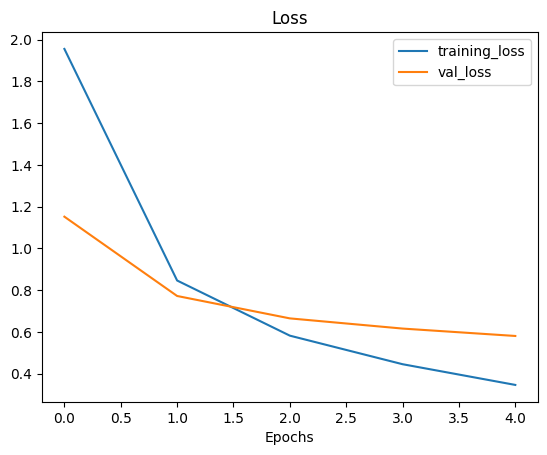

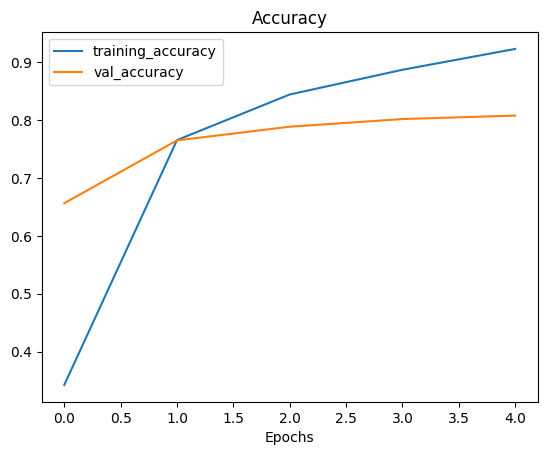

In [ ]:
plot_loss_curves(resnet_history)

In [ ]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             42626560  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 42,647,050
Trainable params: 20,490
Non-trainable params: 42,626,560
_________________________________________________________________


In [ ]:
efficientnet_model = create_model(model_url=efficientnet_url,
                                  classes=train_data_10_percent.num_classes)

# Compile EfficientNet model
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model
efficientnet_history = efficientnet_model.fit(train_data_10_percent, # only use 10% of training data
                                              epochs=5, # train for 5 epochs
                                              steps_per_epoch=len(train_data_10_percent),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              )

Epoch 1/5
24/24 [==============================] - 25s 826ms/step - loss: 1.9189 - accuracy: 0.4253 - val_loss: 1.4946 - val_accuracy: 0.6504
Epoch 2/5
24/24 [==============================] - 17s 741ms/step - loss: 1.2968 - accuracy: 0.7093 - val_loss: 1.1122 - val_accuracy: 0.7224
Epoch 3/5
24/24 [==============================] - 25s 1s/step - loss: 0.9997 - accuracy: 0.7747 - val_loss: 0.9344 - val_accuracy: 0.7472
Epoch 4/5
24/24 [==============================] - 18s 771ms/step - loss: 0.8331 - accuracy: 0.8053 - val_loss: 0.8426 - val_accuracy: 0.7692
Epoch 5/5
24/24 [==============================] - 17s 742ms/step - loss: 0.7332 - accuracy: 0.8347 - val_loss: 0.7818 - val_accuracy: 0.7748


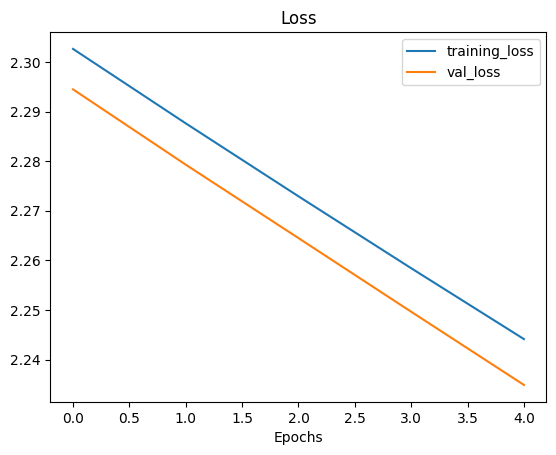

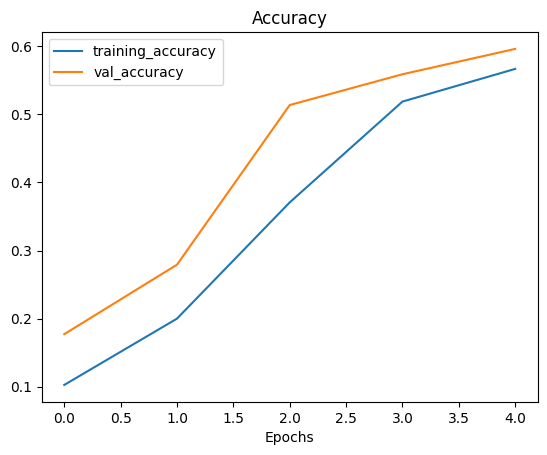

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:
efficientnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1000)             5330564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                10010     
                                                                 
Total params: 5,340,574
Trainable params: 10,010
Non-trainable params: 5,330,564
_________________________________________________________________


In [ ]:
#we can see even for the 10% of the data the model gives extra ordinary accuracy.